In [4]:
# Modulos
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [5]:
# Datos
start_time = (pd.Timestamp.today() - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
end_time = pd.Timestamp.today().strftime('%Y-%m-%d')
acciones = ['^IBEX','^GSPC','^N225']
stock_list = []

for i in acciones:
    stock_values = yf.download(i, start = start_time, end = end_time)
    stock_values.columns = stock_values.columns.get_level_values(0)
    stock_values = stock_values.reset_index()
    stock_values = pd.DataFrame({'fecha':stock_values['Date'], 'CLOSE_'+i:stock_values['Close']})
    stock_list.append(stock_values)

final_stock_values = pd.merge(stock_list[0], stock_list[1], how='left', on='fecha')
final_stock_values = pd.merge(final_stock_values, stock_list[2], how='left', on='fecha')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Ajustando el index
final_stock_values.set_index('fecha',inplace=True)

# Ajustando la frecuencia
final_stock_values = final_stock_values.asfreq('b')

# Valores faltantes
final_stock_values['CLOSE_^IBEX'] = final_stock_values['CLOSE_^IBEX'].fillna(method='ffill')
final_stock_values['CLOSE_^GSPC'] = final_stock_values['CLOSE_^GSPC'].fillna(method='ffill')
final_stock_values['CLOSE_^N225'] = final_stock_values['CLOSE_^N225'].fillna(method='ffill')

C:\Users\Edgar\AppData\Local\Temp/ipykernel_15920/3000915576.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_stock_values['CLOSE_^IBEX'] = final_stock_values['CLOSE_^IBEX'].fillna(method='ffill')
C:\Users\Edgar\AppData\Local\Temp/ipykernel_15920/3000915576.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_stock_values['CLOSE_^GSPC'] = final_stock_values['CLOSE_^GSPC'].fillna(method='ffill')
C:\Users\Edgar\AppData\Local\Temp/ipykernel_15920/3000915576.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_stock_values['CLOSE_^N225'] = final_stock_values['CLOSE_^N225'].fillna(method='ffill')


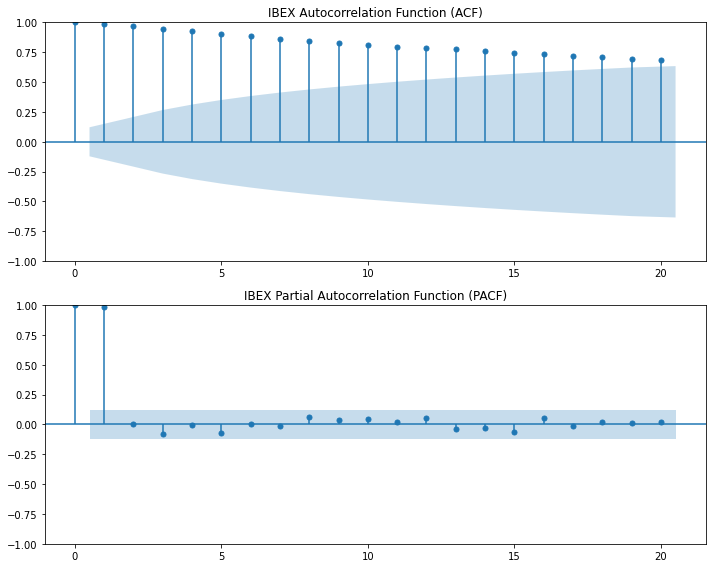

In [7]:
# Correlograma IBEX
# Graficar el ACF (Autocorrelation Function)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Correlograma de la ACF
plot_acf(final_stock_values['CLOSE_^IBEX'], lags=20, ax=ax[0])
ax[0].set_title("IBEX Autocorrelation Function (ACF)")

# Correlograma de la PACF
plot_pacf(final_stock_values['CLOSE_^IBEX'], lags=20, ax=ax[1])
ax[1].set_title("IBEX Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

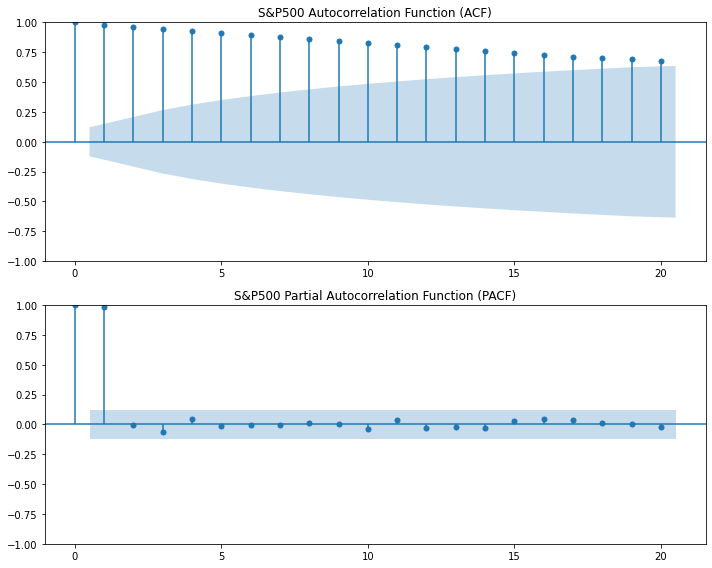

In [9]:
# Correlograma S&P500
# Graficar el ACF (Autocorrelation Function)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Correlograma de la ACF
plot_acf(final_stock_values['CLOSE_^GSPC'], lags=20, ax=ax[0])
ax[0].set_title("S&P500 Autocorrelation Function (ACF)")

# Correlograma de la PACF
plot_pacf(final_stock_values['CLOSE_^GSPC'], lags=20, ax=ax[1])
ax[1].set_title("S&P500 Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

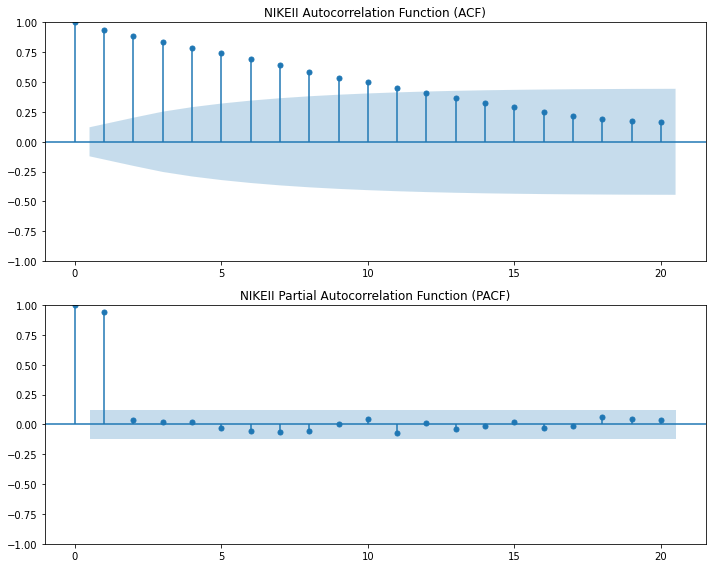

In [10]:
# Correlograma NIKEII
# Graficar el ACF (Autocorrelation Function)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Correlograma de la ACF
plot_acf(final_stock_values['CLOSE_^N225'], lags=20, ax=ax[0])
ax[0].set_title("NIKEII Autocorrelation Function (ACF)")

# Correlograma de la PACF
plot_pacf(final_stock_values['CLOSE_^N225'], lags=20, ax=ax[1])
ax[1].set_title("NIKEII Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [43]:
# Modelos
ibex_model = sm.tsa.ARIMA(final_stock_values['CLOSE_^IBEX'], order=(1, 1, 4))
ibex_results = ibex_model.fit()

sp500_model = sm.tsa.ARIMA(final_stock_values['CLOSE_^GSPC'], order=(1, 1, 4))
sp500_results = sp500_model.fit()

nikei_model = sm.tsa.ARIMA(final_stock_values['CLOSE_^N225'], order=(1, 1, 3))
nikei_results = nikei_model.fit()

In [44]:
# Predicciones
forecast_stocks = pd.concat([pd.DataFrame({'fecha':ibex_results.get_forecast(steps=5).summary_frame().index,
                                           'forectast_ibex_inf':ibex_results.get_forecast(steps=5).summary_frame()['mean_ci_lower'],
                                           'forecast_ibex':ibex_results.get_forecast(steps=5).summary_frame()['mean'],
                                           'forecast_ibex_sup':ibex_results.get_forecast(steps=5).summary_frame()['mean_ci_upper']}).reset_index(drop=True),

                            pd.DataFrame({'forectast_sp500_inf':sp500_results.get_forecast(steps=5).summary_frame()['mean_ci_lower'],
                                          'forecast_sp500':sp500_results.get_forecast(steps=5).summary_frame()['mean'],
                                          'forecast_sp500_sup':sp500_results.get_forecast(steps=5).summary_frame()['mean_ci_upper']}).reset_index(drop=True),

                            pd.DataFrame({'forectast_nikei_inf':nikei_results.get_forecast(steps=5).summary_frame()['mean_ci_lower'],
                                          'forecast_nikei':nikei_results.get_forecast(steps=5).summary_frame()['mean'],
                                          'forecast_nikei_sup':nikei_results.get_forecast(steps=5).summary_frame()['mean_ci_upper']}).reset_index(drop=True)], axis=1)

In [45]:
forecast_stocks

,fecha,forectast_ibex_inf,forecast_ibex,forecast_ibex_sup,forectast_sp500_inf,forecast_sp500,forecast_sp500_sup,forectast_nikei_inf,forecast_nikei,forecast_nikei_sup
0,2024-12-16,11589.068535,11762.937271,11936.806007,5973.167536,6052.987795,6132.808054,38322.488963,39482.464786,40642.440609
1,2024-12-17,11495.545294,11743.485546,11991.425798,5941.808603,6056.857575,6171.906547,37809.012234,39442.149306,41075.286378
2,2024-12-18,11435.302101,11749.822200,12064.342300,5909.778331,6051.093670,6192.409009,37471.020179,39475.256373,41479.492567
3,2024-12-19,11384.933483,11748.083371,12111.233259,5892.348456,6055.345068,6218.341680,37194.878961,39469.463140,41744.047320
4,2024-12-20,11333.638607,11748.754484,12163.870361,5867.265622,6052.640406,6238.015190,36947.936370,39470.476868,41993.017366
